### Load the data into a Python session as Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("auto-mpg.csv")

In [3]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


### Split the data 75% and 25 testing

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25)

### Visualize necessary columns in the data. After this point, you should have three lists

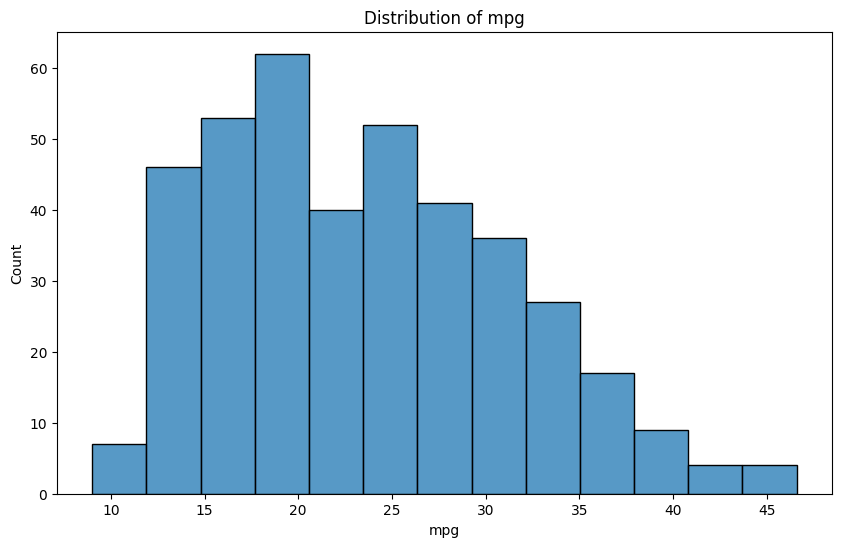

Skewness of mpg: 0.45706634399491913 (Symmetric)


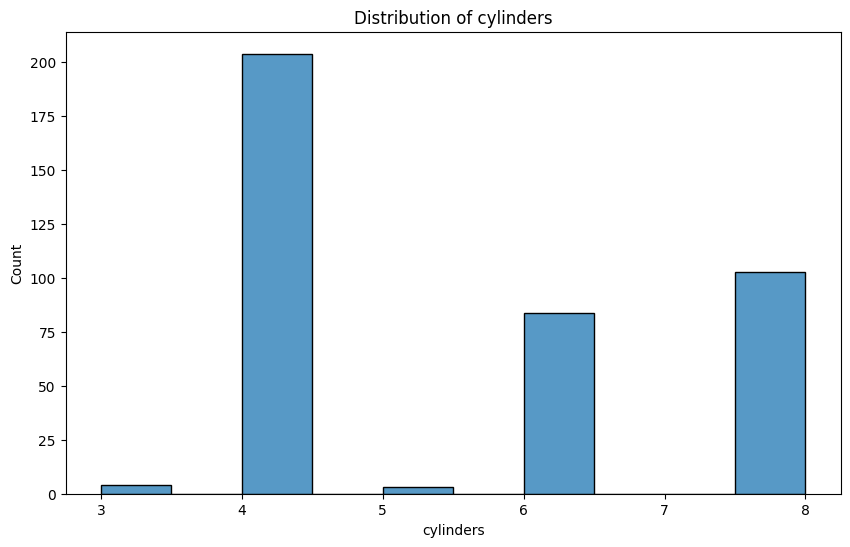

Skewness of cylinders: 0.5269215453528939 (Skewed)


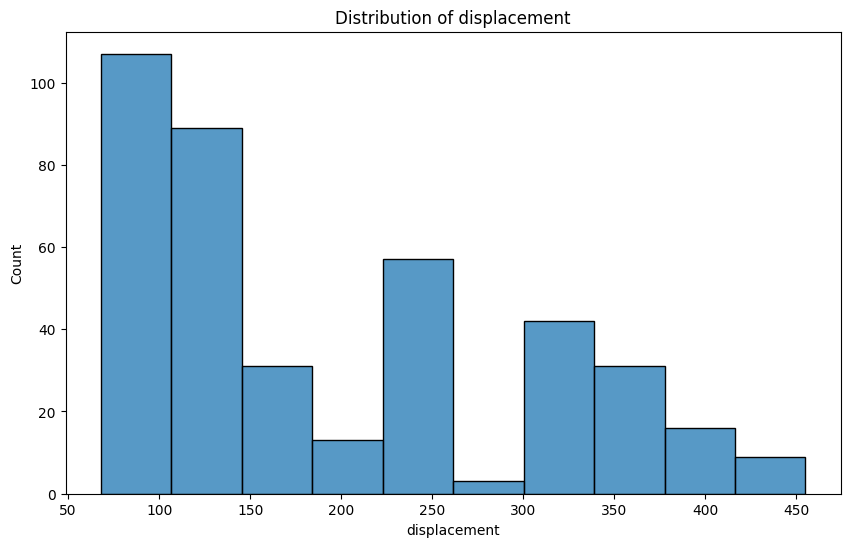

Skewness of displacement: 0.7196451643005952 (Skewed)


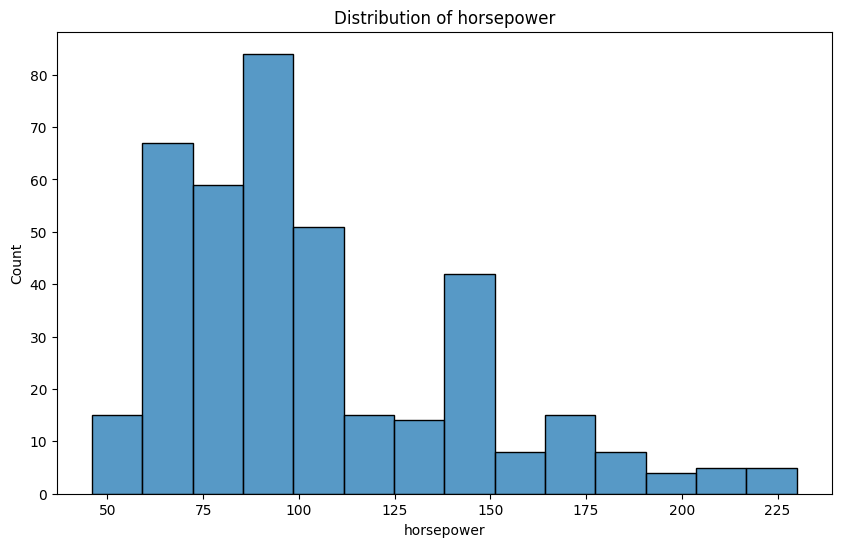

Skewness of horsepower: 1.0873262824048695 (Skewed)


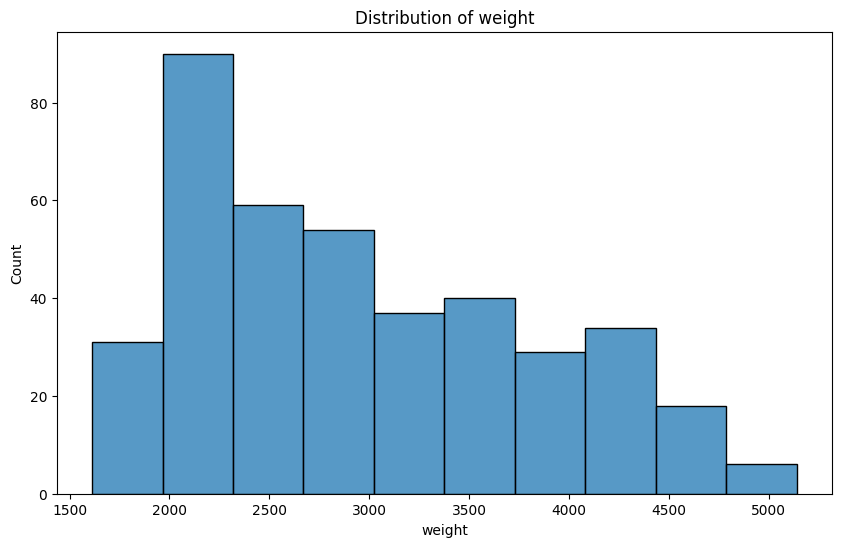

Skewness of weight: 0.5310625125994629 (Skewed)


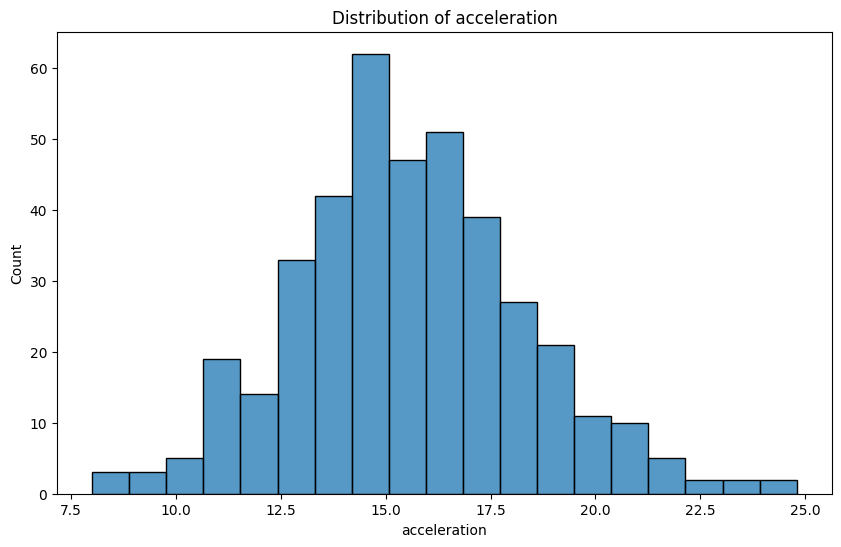

Skewness of acceleration: 0.27877684462588986 (Symmetric)


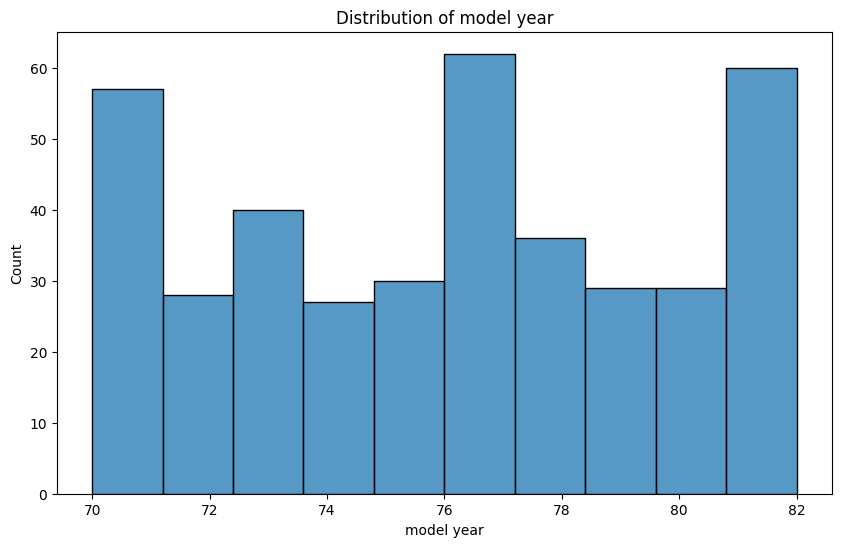

Skewness of model year: 0.01153459401509278 (Symmetric)


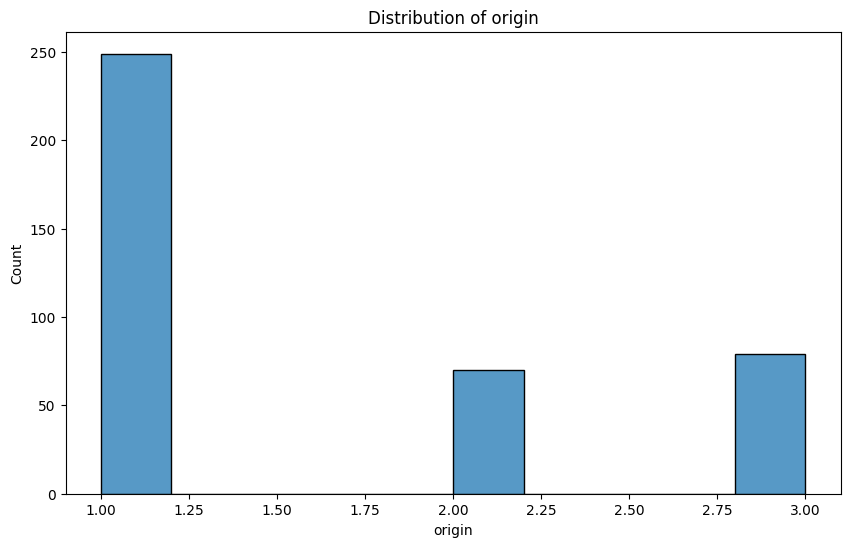

Skewness of origin: 0.9237762994760227 (Skewed)


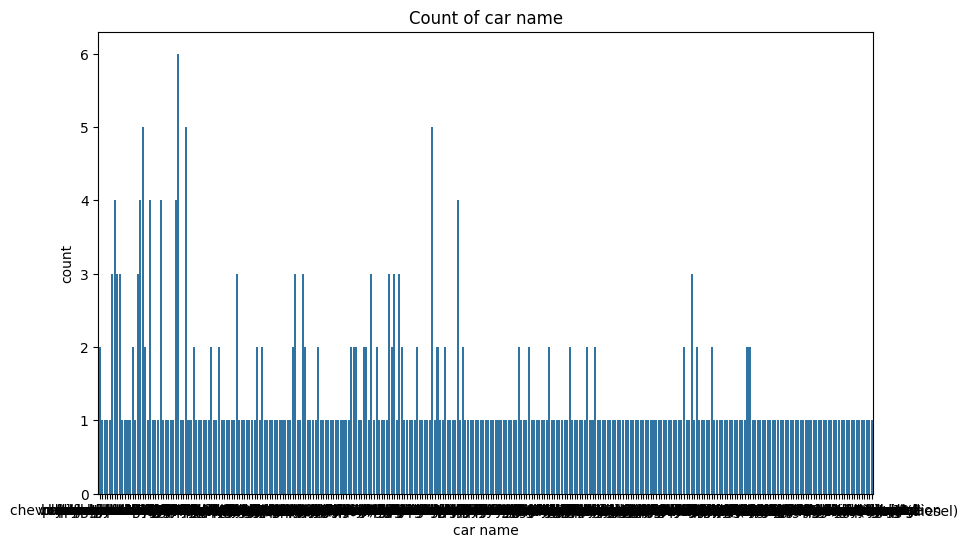

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualize numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
symmetric_columns = []
skewed_columns = []

for column in numeric_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x=column)
  plt.title(f'Distribution of {column}')
  plt.show()

  skewness = df[column].skew()
  if abs(skewness) > 0.5:
    print(f"Skewness of {column}: {skewness} (Skewed)")
    skewed_columns.append(column)
  else:
    print(f"Skewness of {column}: {skewness} (Symmetric)")
    symmetric_columns.append(column)

# Visualize categorical columns
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, x=column)
  plt.title(f'Count of {column}')
  plt.show()

### Build a pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric_symmetric', numeric_symmetric_pipeline, symmetric_columns),
    ('numeric_skewed', numeric_skewed_pipeline, skewed_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

### Train the pipeline on the training data. Then perform trainsformation on the training data and testing data

In [10]:
preprocessor.fit(df)
transformed_train = preprocessor.transform(train)
transformed_test = preprocessor.transform(test)

### Print the shape of the processed training data and processed testing data

In [13]:
transformed_train.shape

(298, 313)

In [14]:
transformed_test.shape

(100, 313)